Центральная предельная теорема своими руками.

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;

краткие описания каждого блока кода, объясняющие, что он делает;

необходимые графики (убедитесь, что на них подписаны оси);

выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

выводы по результатам выполнения задания.


In [122]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean
import numpy as np
import scipy.stats as sts
from scipy.stats import rayleigh,norm
import matplotlib.pyplot as plt
#Рассматриваем распределение Релея. 
#Введено впервые в 1880 г. 
#Джоном Уильямом Стреттом (лордом Рэлеем) в связи с задачей сложения гармонических колебаний со случайными фазами.

sample=rayleigh.rvs(size = 1000)  # Выборка 1000 случайных величин


Text(0.5, 0, '$x$')

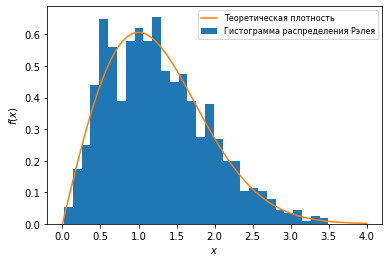

In [124]:
count, bins, ignored = plt.hist(sample, 30, density=True, label='Гистограмма распределения Рэлея')
x = np.linspace(0., 4., num=100) # сетка для построения графика
plt.plot(x, rayleigh.pdf(x), label='Теоретическая плотность')
plt.legend(fontsize=8, loc=1)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


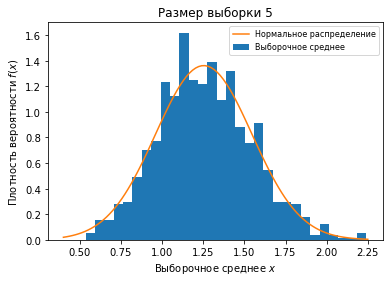

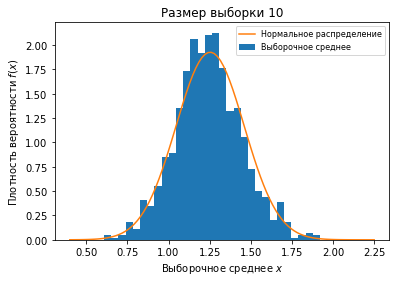

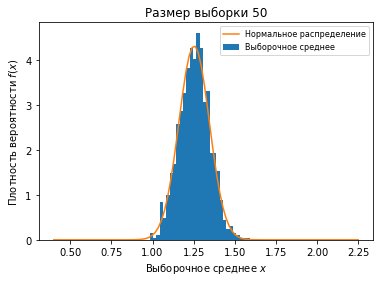

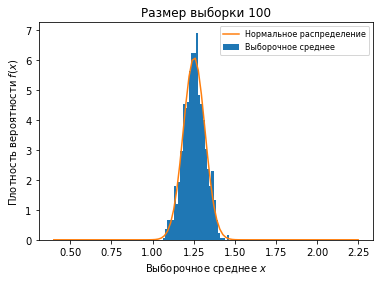

In [133]:
#Дисперсия вычисляется по формуле (2-Pi/2)*sigma^2. Легко найти, что это 0.4292*sigma^2
#Мат. ожидание Sqrt(Pi/2)*sigma. 1.253*sigma
#А вот эта вот сигма в данном случае ни что иное, как параметр scale, а он по умолчанию =1, поэтому я его просто радостно опускаю
#и не хочу ничего менять
for n in [5, 10, 50,100]:  # просто как вариант - можно сразу 4 графика построить
    sample2=rayleigh.rvs(size = n)
    sample_n=[]
    for i in range(1000):
        sample_n.append(rayleigh.rvs(size = n).mean())     
    plt.hist(sample_n, 30, density=True, label='Выборочное среднее')
    norm_rv = sts.norm(1.253, np.sqrt(0.4292/n))
    x = np.linspace(0.4, 2.25, 100)
#pdf = norm_rv.pdf(x)
    # и вырисовывается на графике
    plt.plot(x, norm_rv.pdf(x), label='Нормальное распределение')
    plt.legend(fontsize=8, loc=1)
    plt.title("Размер выборки %d" % n)
    plt.ylabel('Плотность вероятности $f(x)$')
    plt.xlabel('Выборочное среднее $x$')
    plt.show()

При увеличении размера выборки n, распределение средних значений начинает сходиться к 1.25 (матожидание), среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет. При n = 50 выборочное распределение средних становится приближенно нормальным. В любом случае среднее выборочных средних всегда совпадает с математическим ожиданием генеральной совокупности, а его изменчивость при увеличении объема выборок уменьшается.
